In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install pandas
!pip install scikit-learn
!pip install wordcloud

In [7]:
file = '/content/drive/MyDrive/spam.txt'

In [8]:
with open(file,'r',encoding='utf8') as f:
  lines = f.readlines()

In [9]:
x_data, y_data = [], []
for line in lines:
  label, message = line.strip().split('\t')
  x_data.append(message)
  y_data.append(label)

### Inspection

In [11]:
from collections import Counter
c = Counter()
for words in x_data:
  c.update(words.split())

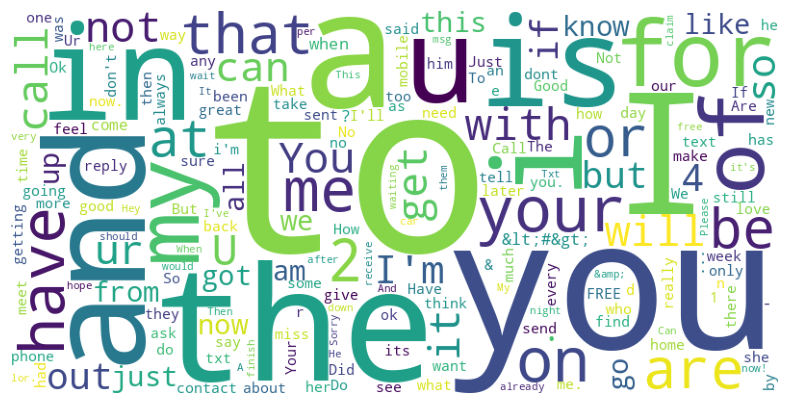

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(c)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Preprocessing

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
def preprocess_text(text):
  """
    FILL THIS BLANK
  """
  return tokens

### Modeling and Training

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=preprocess_text)
X = vectorizer.fit_transform(x_data)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, random_state=42)

In [21]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

### Evaluation

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.98
Precision: 1.0
Recall: 0.8125
F1 Score: 0.896551724137931


### Deployment

In [25]:
new_message = "Congratulations! You've won a free trip to Hawaii. Click the link to claim your prize."

new_message_vector = vectorizer.transform([new_message])
prediction = svm_model.predict(new_message_vector)

print("Prediction:", prediction[0])

Prediction: spam
